# Prediction using Decision Tree Algorithm

# Intermediate level task 2

The tools going to be used for Exploratory Data Analysis are Numpy and Pandas for Mathematical and Statistical Functions and for Visualization we will be using Matplotlib and Seaborn. Also, to create interactive plots with very little code we will be using plotly.express

## Data Preprocessing

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_palette('pastel')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data 
df=pd.read_csv('D:\\Sanku\\LGM\\Iris.csv')
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [3]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
df.tail()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.shape

(150, 6)

---------------------------------------------------------------------------------------

## Data Cleaning

In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## 1. Check for duplicate records and remove it

In [8]:
# Checking for duplicated values
df.duplicated().sum()

0

No duplicate data found.

## 2.Find Missing value and remove if necessary

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No missing value found

## 3.Checking for Unique Values

In [10]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

There are 150 unique values in ID column. So, We will drop this column

In [11]:
# Dropping 'Id' column
df.drop('Id',axis=1,inplace=True)

In [12]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## 4.Renaming the columns

In [13]:
# Renaming the Columns
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [14]:
# Info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
# Describe method automatically performs operations on data and shows count,mean,standard deviation,min,max and etc.
print(df.describe())
print(df.describe)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.

--------------------------------------------------------------------------------------

# Data Visualization

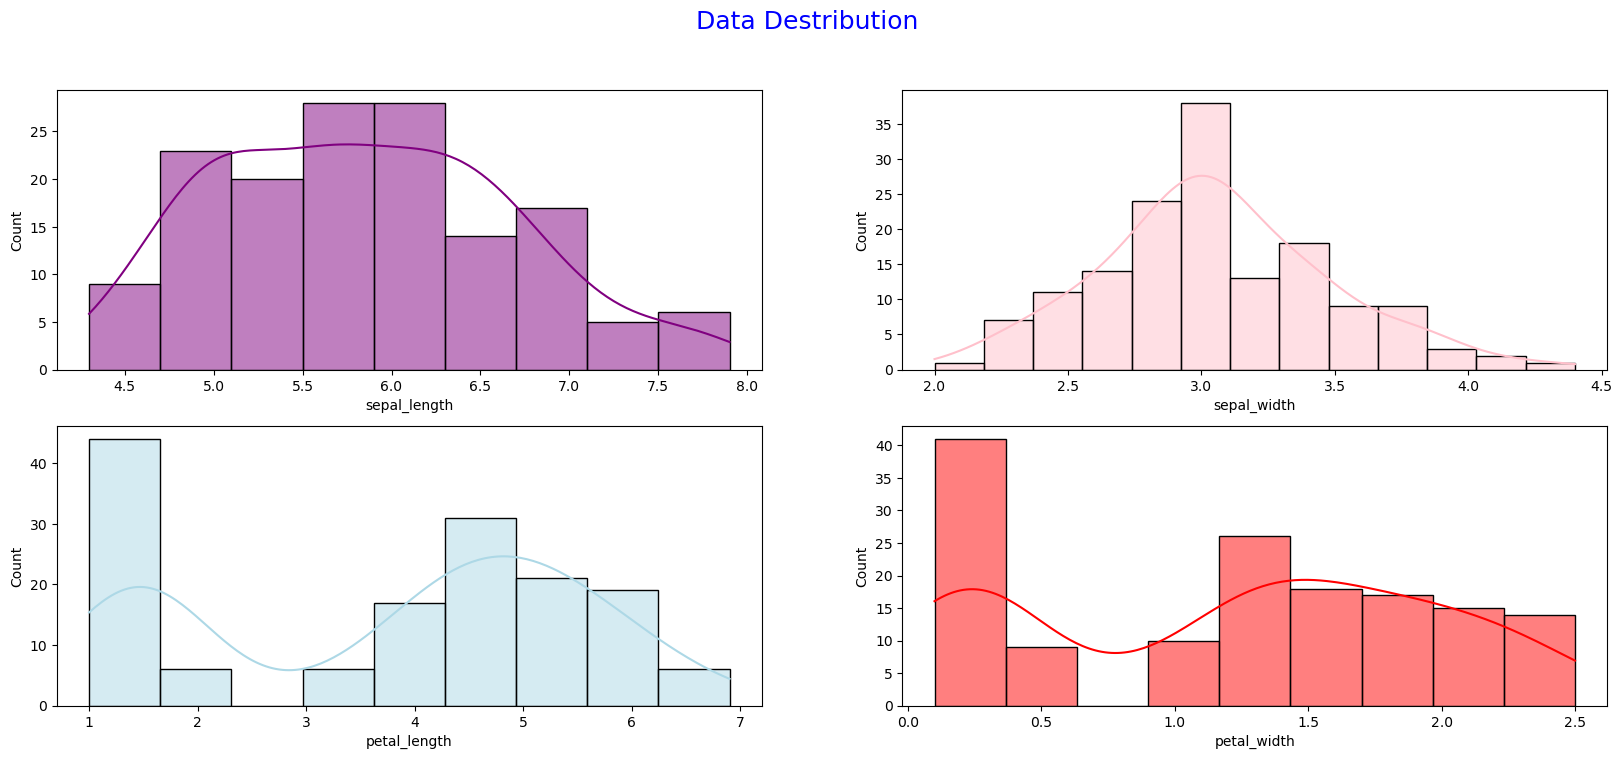

In [16]:
fig,ax=plt.subplots(2,2, figsize=(20,8))
plt.suptitle('Data Destribution', fontsize=18, color='blue')
sns.histplot(x='sepal_length', data=df, color='purple', kde=True, ax=ax[0,0])
sns.histplot(x='sepal_width', data=df, color='pink', kde=True, ax=ax[0,1])
sns.histplot(x='petal_length', data=df, color='lightblue', kde=True, ax=ax[1,0]) 
sns.histplot(data=df, x="petal_width", color='red', kde=True, ax=ax[1,1]);

In [17]:
# Counting the values of species column
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [18]:
labels=df["species"].value_counts()[:12].index
values=df["species"].value_counts()[:12]
colors=["mediumlateblue","darkorange"]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=0.4)])
fig.update_traces(hoverinfo="label+percent+text+value",textinfo="value+label",textfont_size=10,
                 marker=dict(colors=colors,line=dict(color="black",width=3)))
fig.update_layout(title="species",titlefont={"size":25})
fig.show()

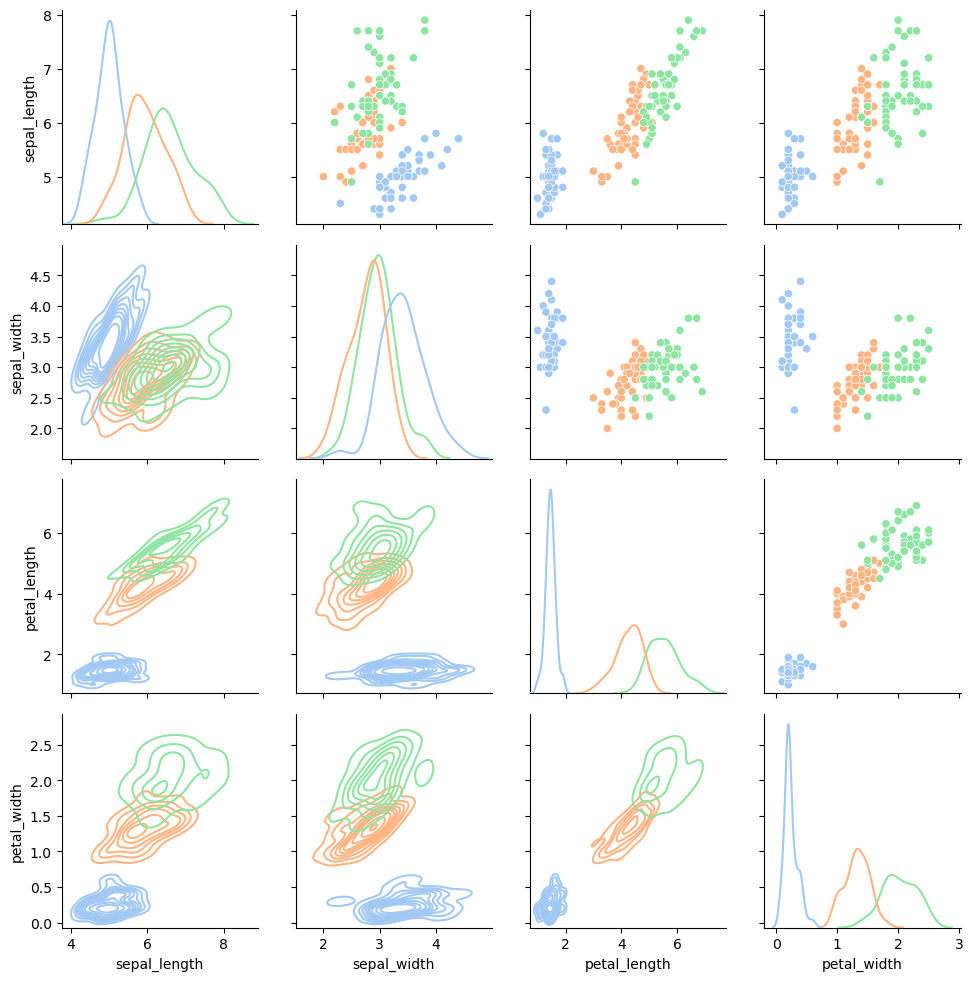

In [19]:
# Pairplot for the data
g = sns.PairGrid(df, diag_sharey=False,hue='species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, color='.3')
plt.show()

<Axes: >

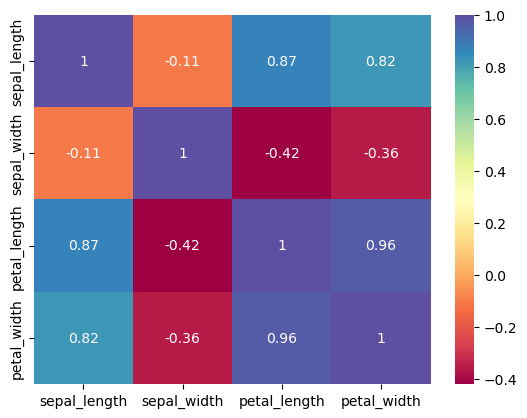

In [20]:
# Correlation plot for the data
sns.heatmap(df.corr(),annot=True, cmap="Spectral")

------------------------------------------------------------------------------------------------

## Data Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [22]:
x = df.drop('species',axis=1) # independent variable
y = df['species']             # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(150, 4)
(150,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Splitting the data into training and testing Data

In [23]:
# Importing Library
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [27]:
def eval_mod(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    print("Confusion_Matrix\n",cm)
    print("Classification_Report\n",classification_report(y_test,y_pred))
    print("Accuracy_Score\n",accuracy_score(y_test,y_pred))

def mscore(model):
    print("Training_Score", model.score(x_train,y_train)) # trainig accuracy
    print("Testing_Score", model.score(x_test,y_test))    # testing accuracy

## Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt=dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

## Generating the Training and testing score

In [30]:
# The model is overfit(if training score is larger than testing score)
mscore(dt)

Training_Score 1.0
Testing_Score 1.0


In [31]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Evaluating the model

In [32]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print(f"Out of total {y_test.shape[0]} test values {sum(y_test!=y_pred)} are missclassified")

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Out of total 30 test values 0 are missclassified


In [33]:
eval_mod(y_test,y_pred_dt)

Confusion_Matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification_Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy_Score
 1.0


In [35]:
dt2=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

In [36]:
mscore(dt2)

Training_Score 0.9583333333333334
Testing_Score 1.0


In [37]:
y_pred_dt2=dt2.predict(x_test)
y_pred_dt2

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [38]:
acc=(accuracy_score(y_test, y_pred)*100).round(4)
results=pd.DataFrame({"Algorithm":["KNN Classifier"], "Accuracy":[acc]})
results

Algorithm  Accuracy
0  KNN Classifier     100.0

In [39]:

y_pred_dt2=dt2.predict(x_test)
y_pred_dt2

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [40]:
# Evaluate the model
eval_mod(y_test,y_pred_dt2)

Confusion_Matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification_Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy_Score
 1.0


In [41]:
from sklearn.model_selection import GridSearchCV

dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf=GridSearchCV(dt, param_grid=parameters, cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [43]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, min_samples_split=2)
dt=dt.fit(x_train,y_train)
y_test_pred=dt.predict(x_test)
(accuracy_score(y_test, y_test_pred)*100).round(4)

100.0

## Graphical representation of Rule Based Decision Tree

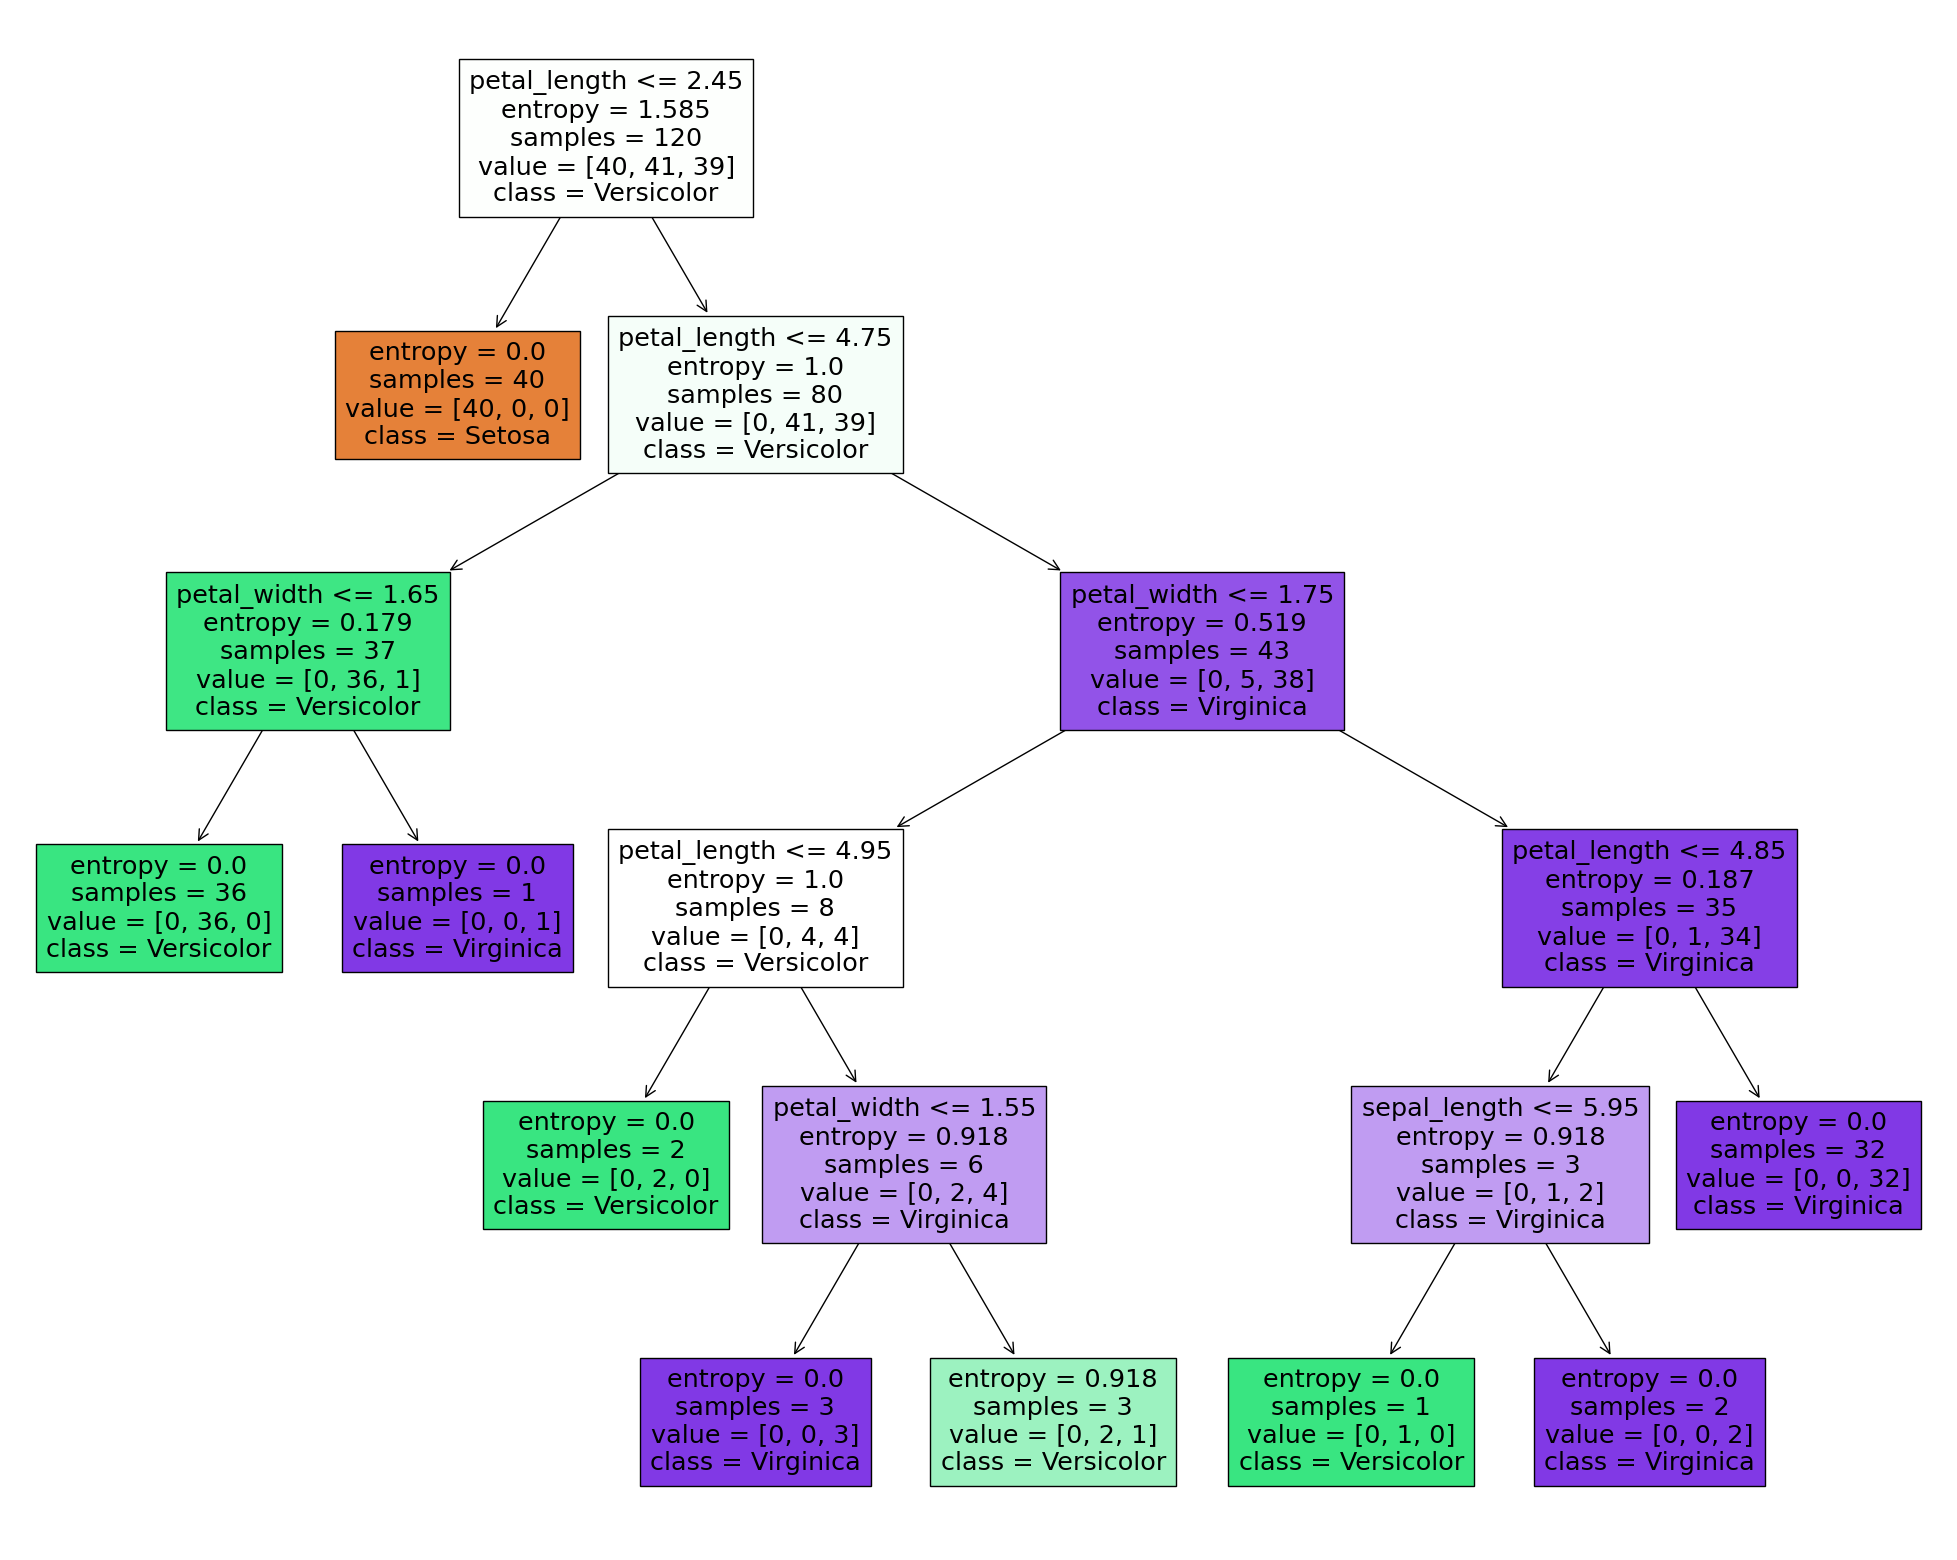

In [44]:
from sklearn import tree
features=df.columns
classes=['Setosa','Versicolor','Virginica']
fig = plt.figure(figsize=(25,20))
fir= tree.plot_tree(dt, 
                   feature_names=features,  
                   class_names=classes,
                   filled=True)
fig.show()

## Checking new dataset

In [45]:
sample=pd.DataFrame({"sepal_length":[4.4,3.2,2.4,6.1],
                     "sepal_width":[3.5,2.8,4.0,3.7],
                     "petal_length":[4,5,1,6],
                     "petal_width":[1,7.5,1.9,6.8]})
sample

sepal_length  sepal_width  petal_length  petal_width
0           4.4          3.5             4          1.0
1           3.2          2.8             5          7.5
2           2.4          4.0             1          1.9
3           6.1          3.7             6          6.8

In [46]:
predict_class=dt.predict(sample)
for iris_class in predict_class:
    if iris_class==0:
        print("Flower is Satosa")
    elif iris_class==1:
        print("Flower is Versicolor")
    else:
        print("Flower is Virginica")

Flower is Versicolor
Flower is Virginica
Flower is Satosa
Flower is Virginica


#### ----------------------------------------------------------------------